In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Dataset
# pip install openpyxl
df = pd.read_excel('Universities.xlsx')
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
df.drop(columns='Univ', inplace=True)

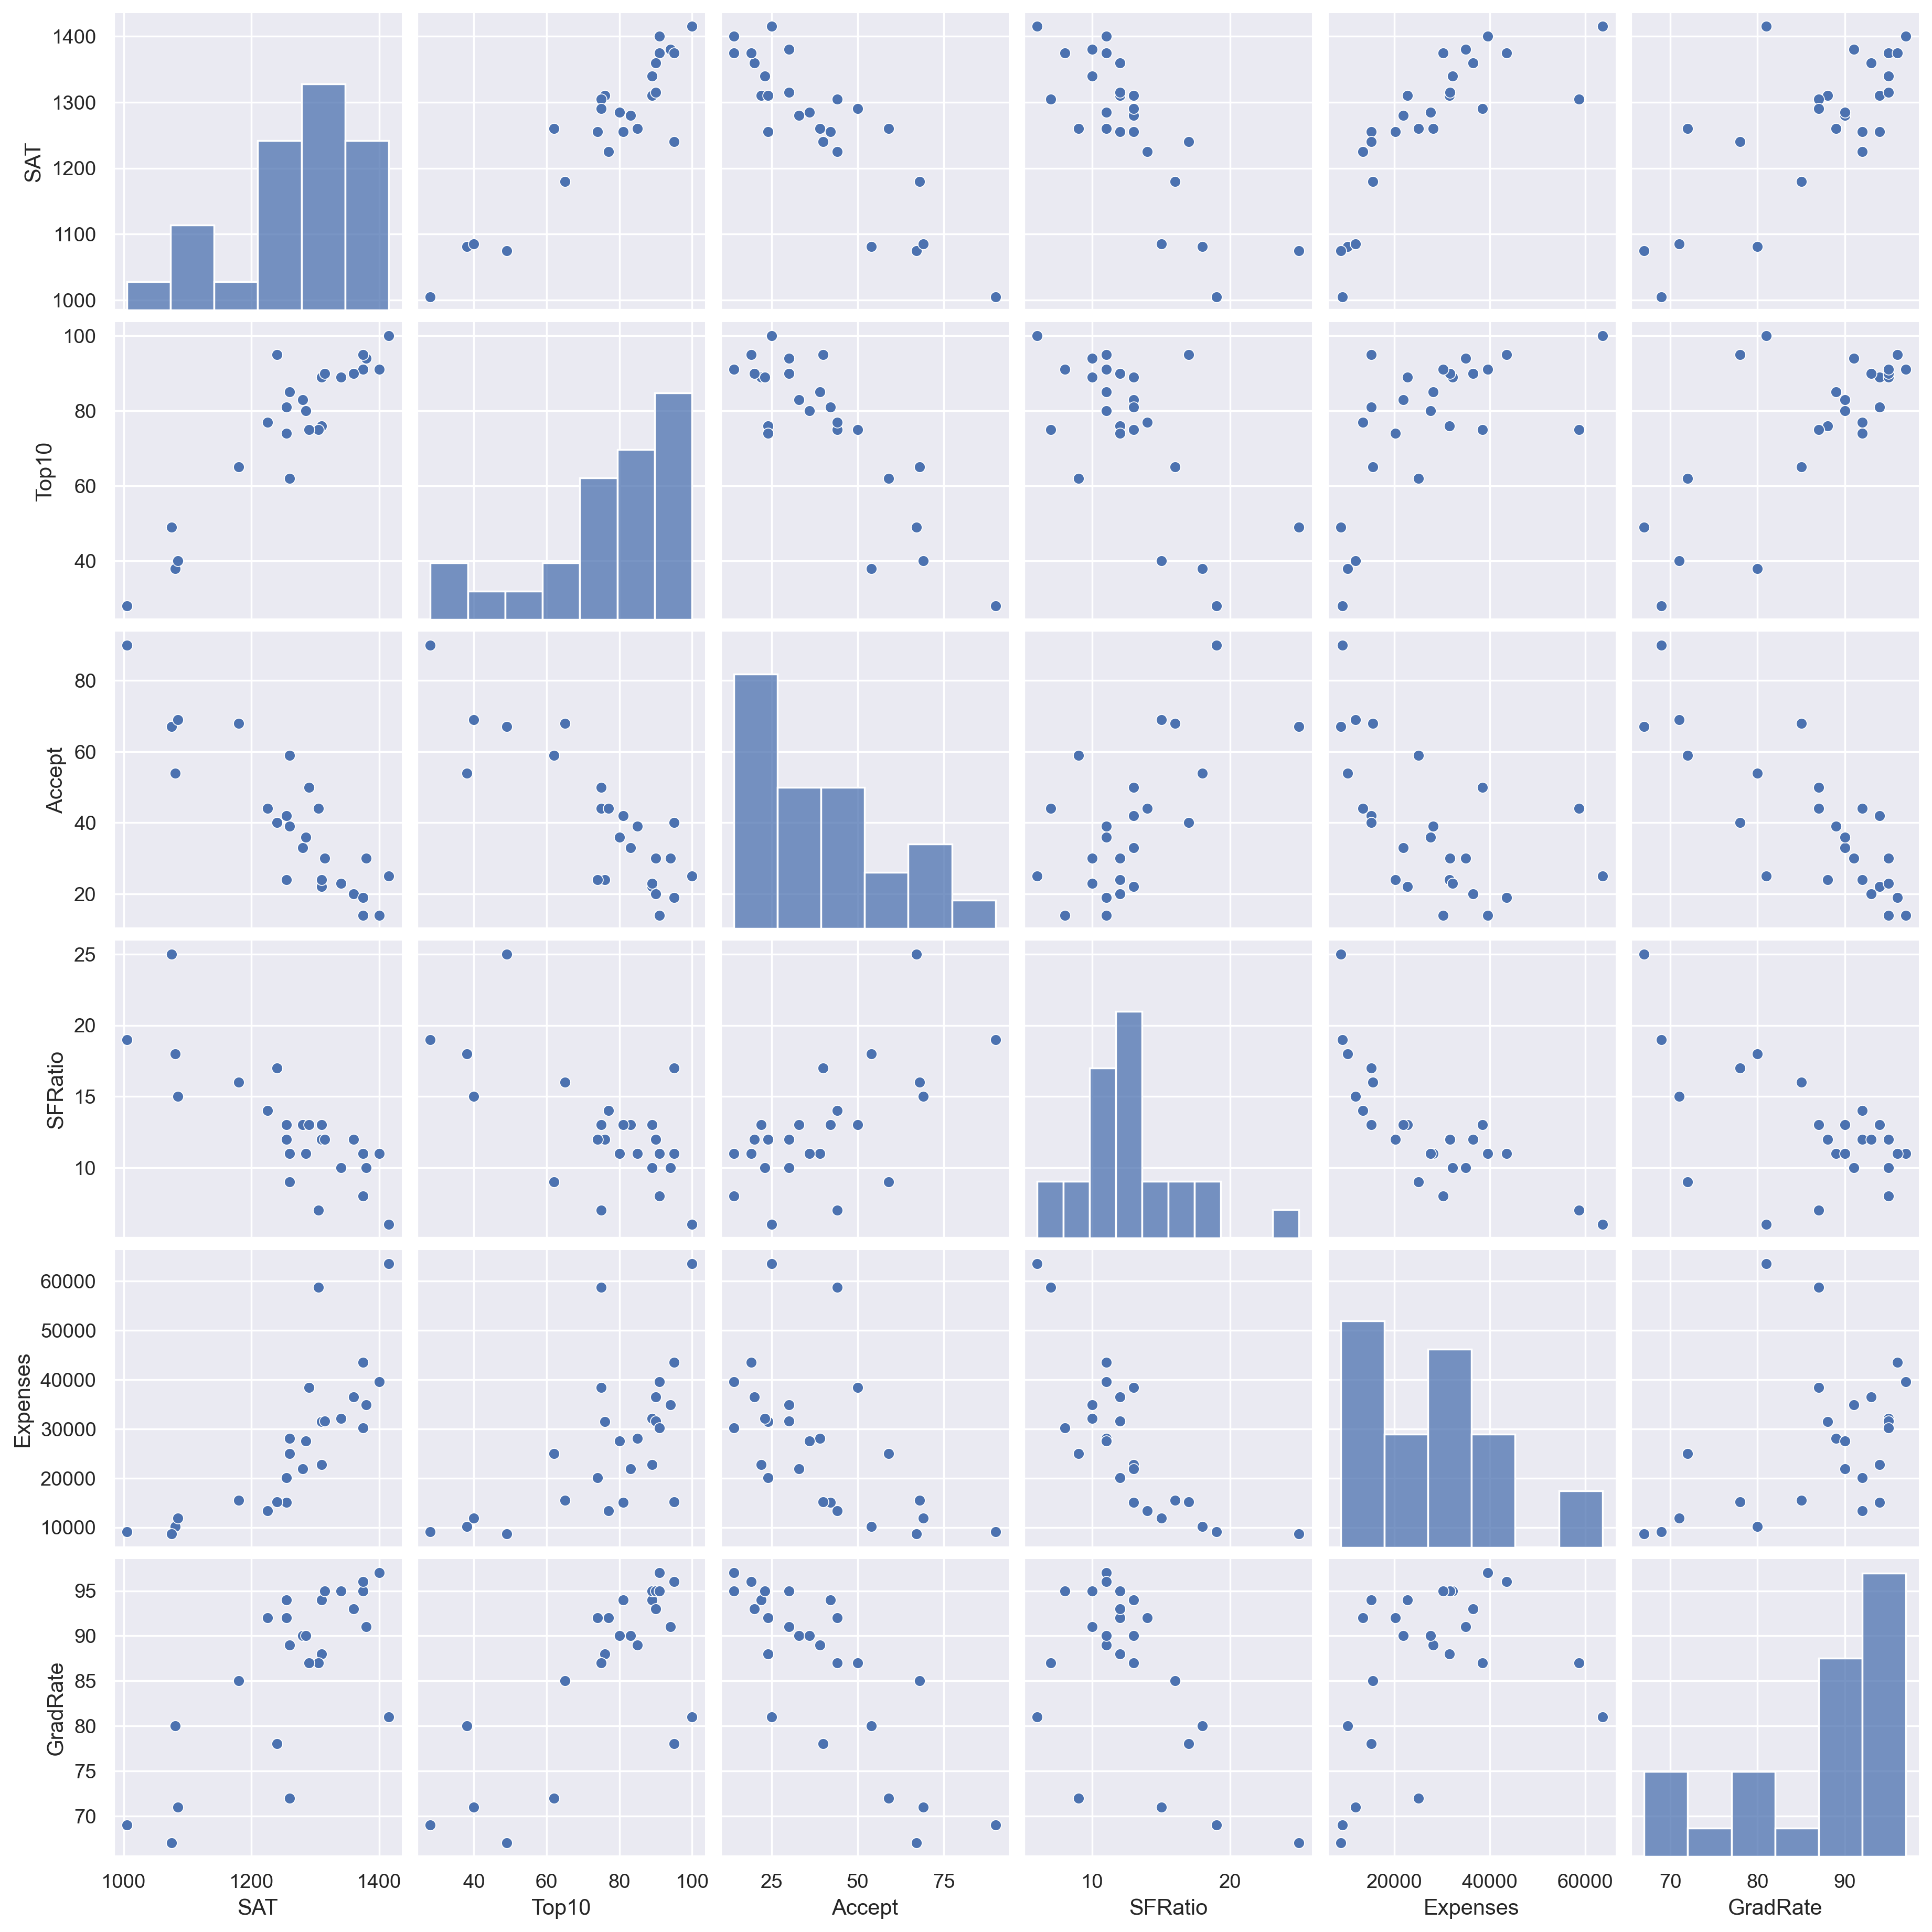

In [4]:
sns.pairplot(df)

#### Feature Scaling
Which ever algorithm find distance between data points Feature Scaling is mandatory 

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
# standardization
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [7]:
#Dendrogram with single and complete linkage

In [8]:
# In order to create a Dendrogram based on Eucidean Distance we need this libary
from scipy.cluster import hierarchy

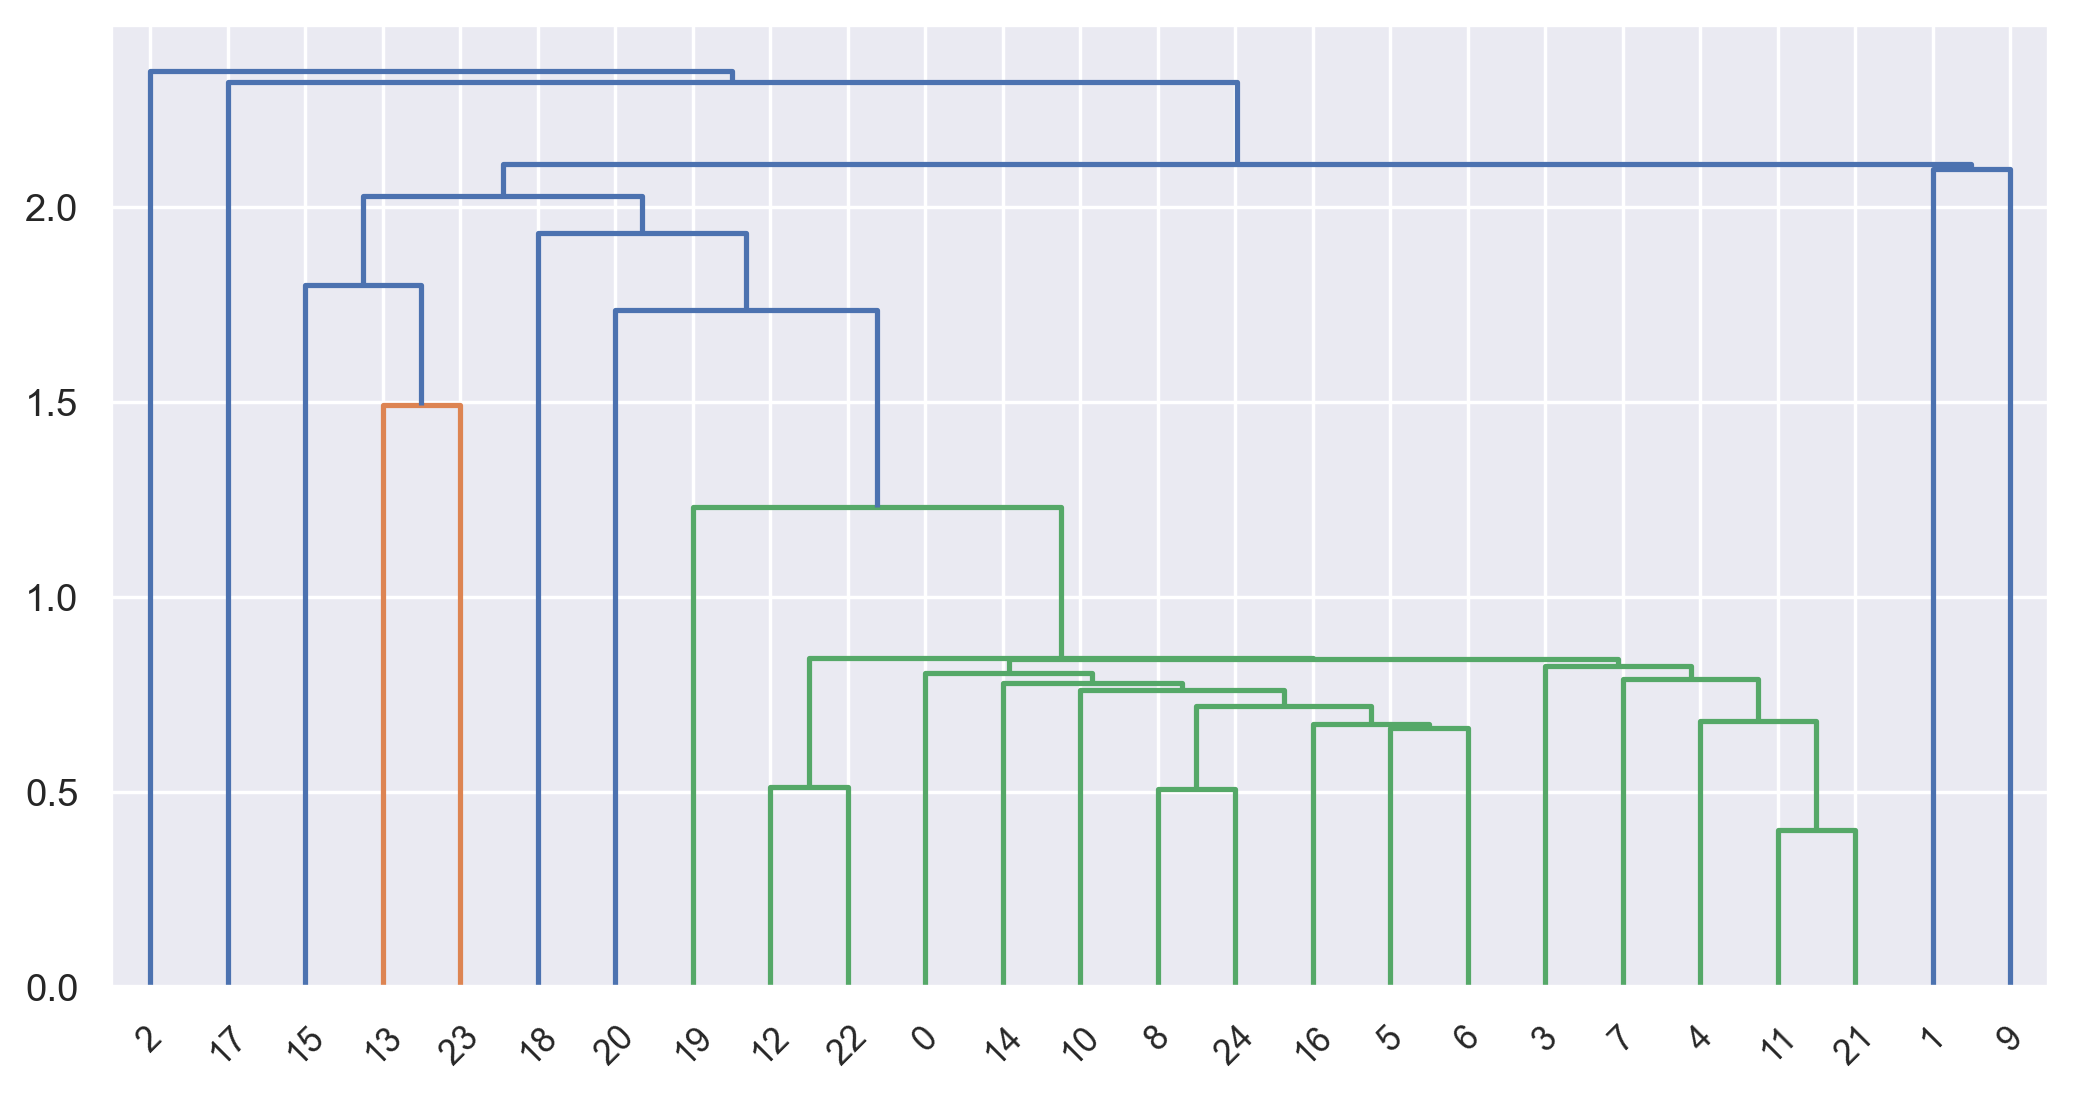

In [9]:
singlelinkage = hierarchy.linkage(x, method='single')
singledend= hierarchy.dendrogram(singlelinkage)

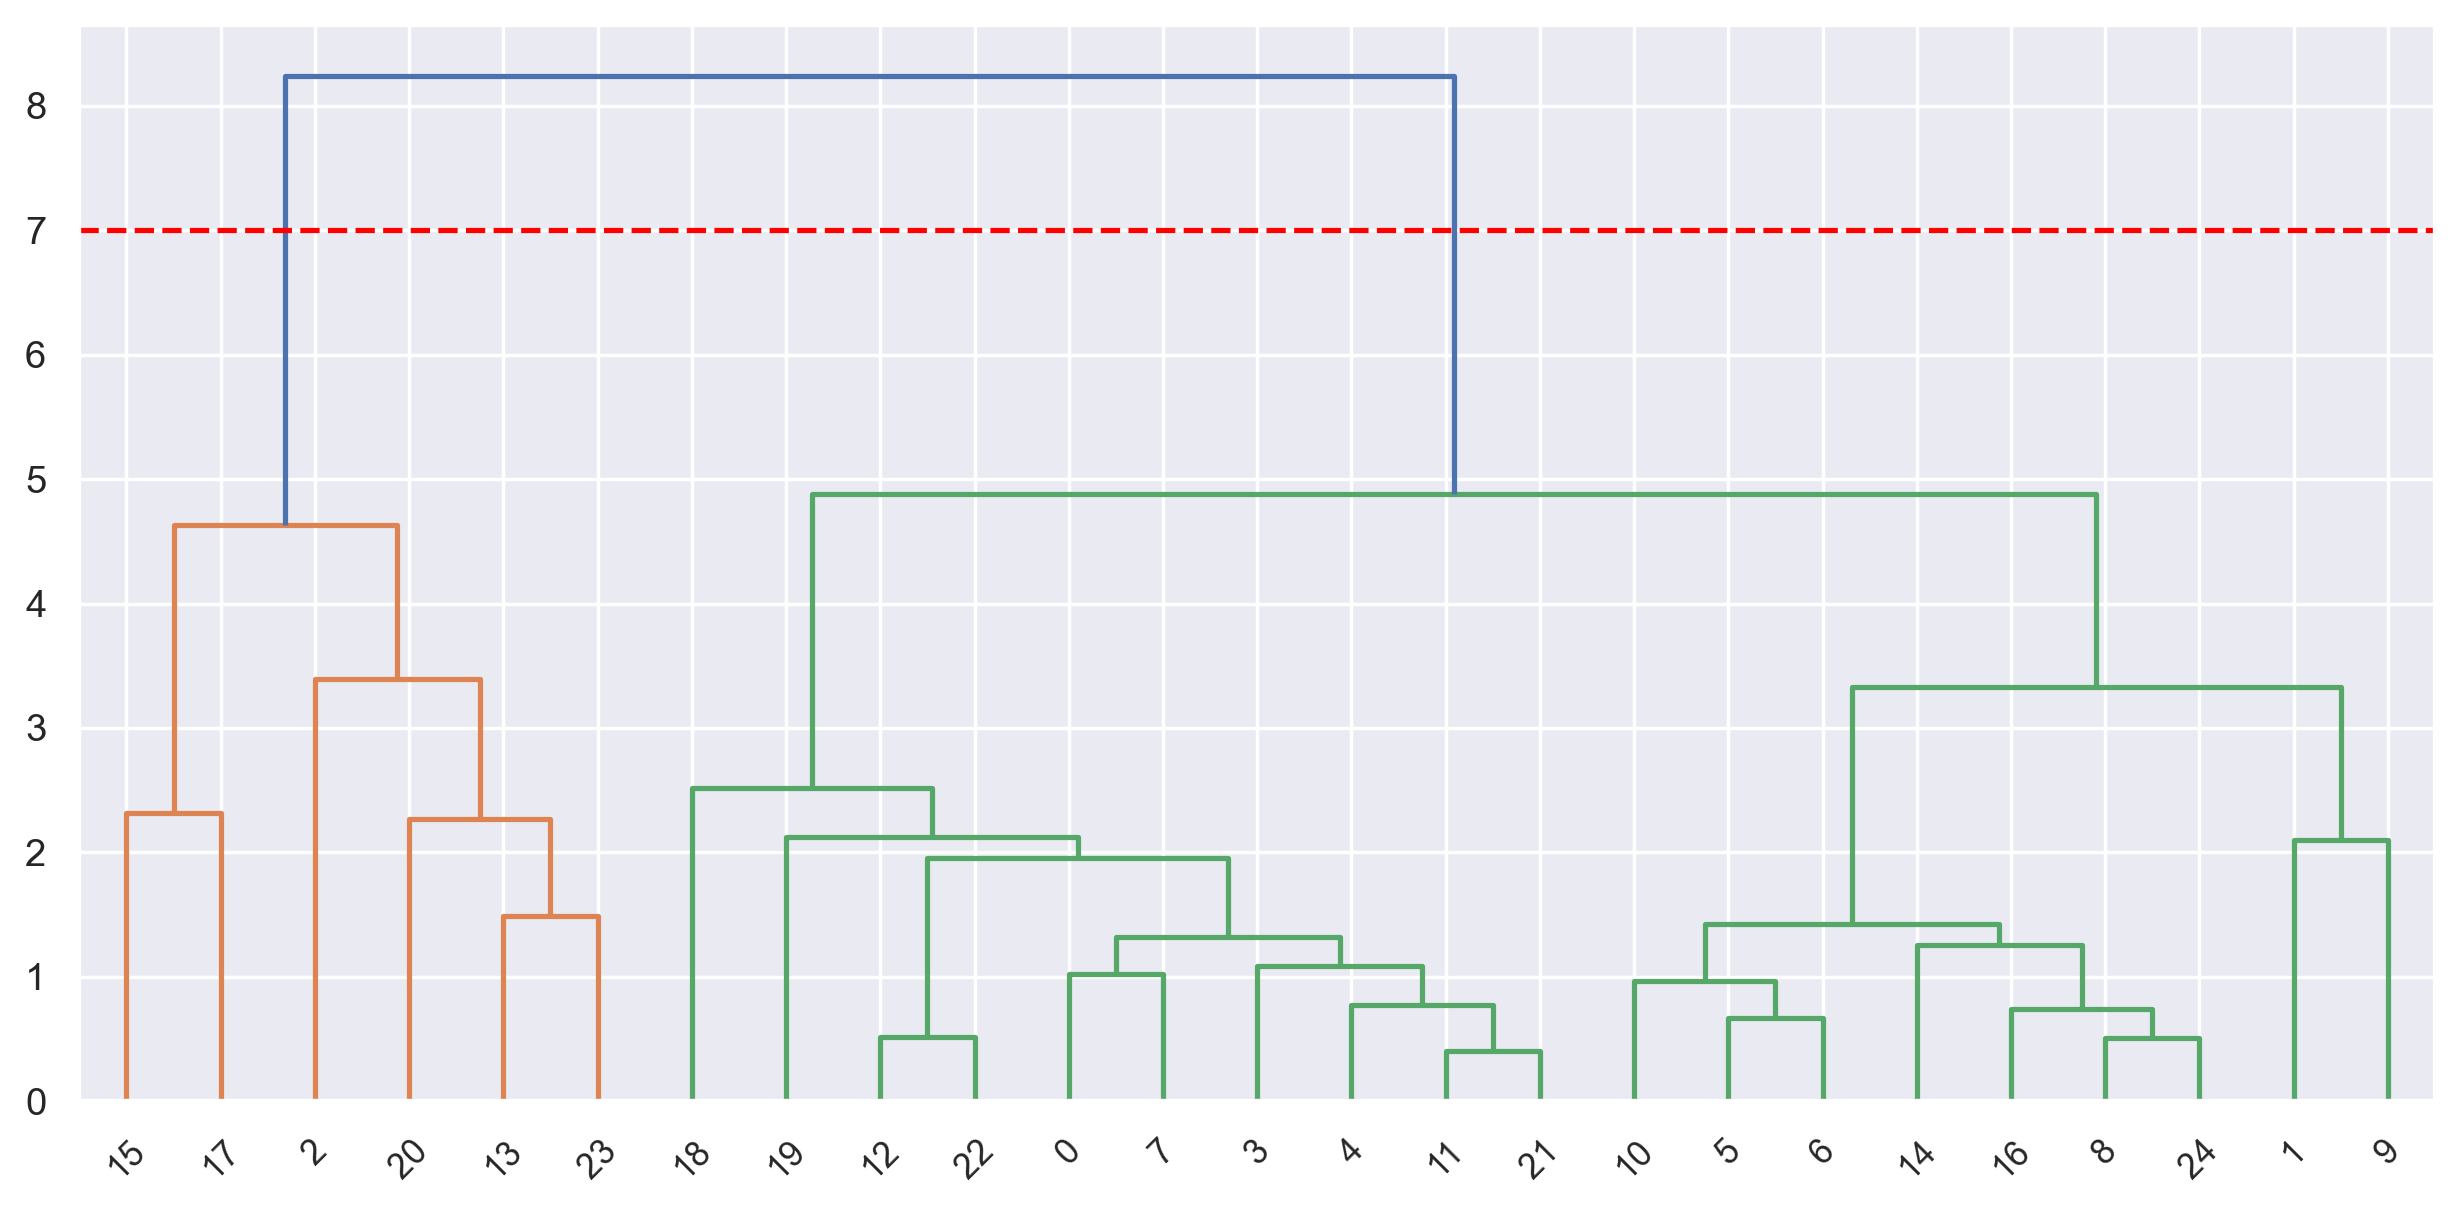

In [10]:
completelinkage = hierarchy.linkage(x, method='complete')
completedend = hierarchy.dendrogram(completelinkage)
plt.axhline(y =7, linestyle = '--', color= 'red')
plt.tight_layout()

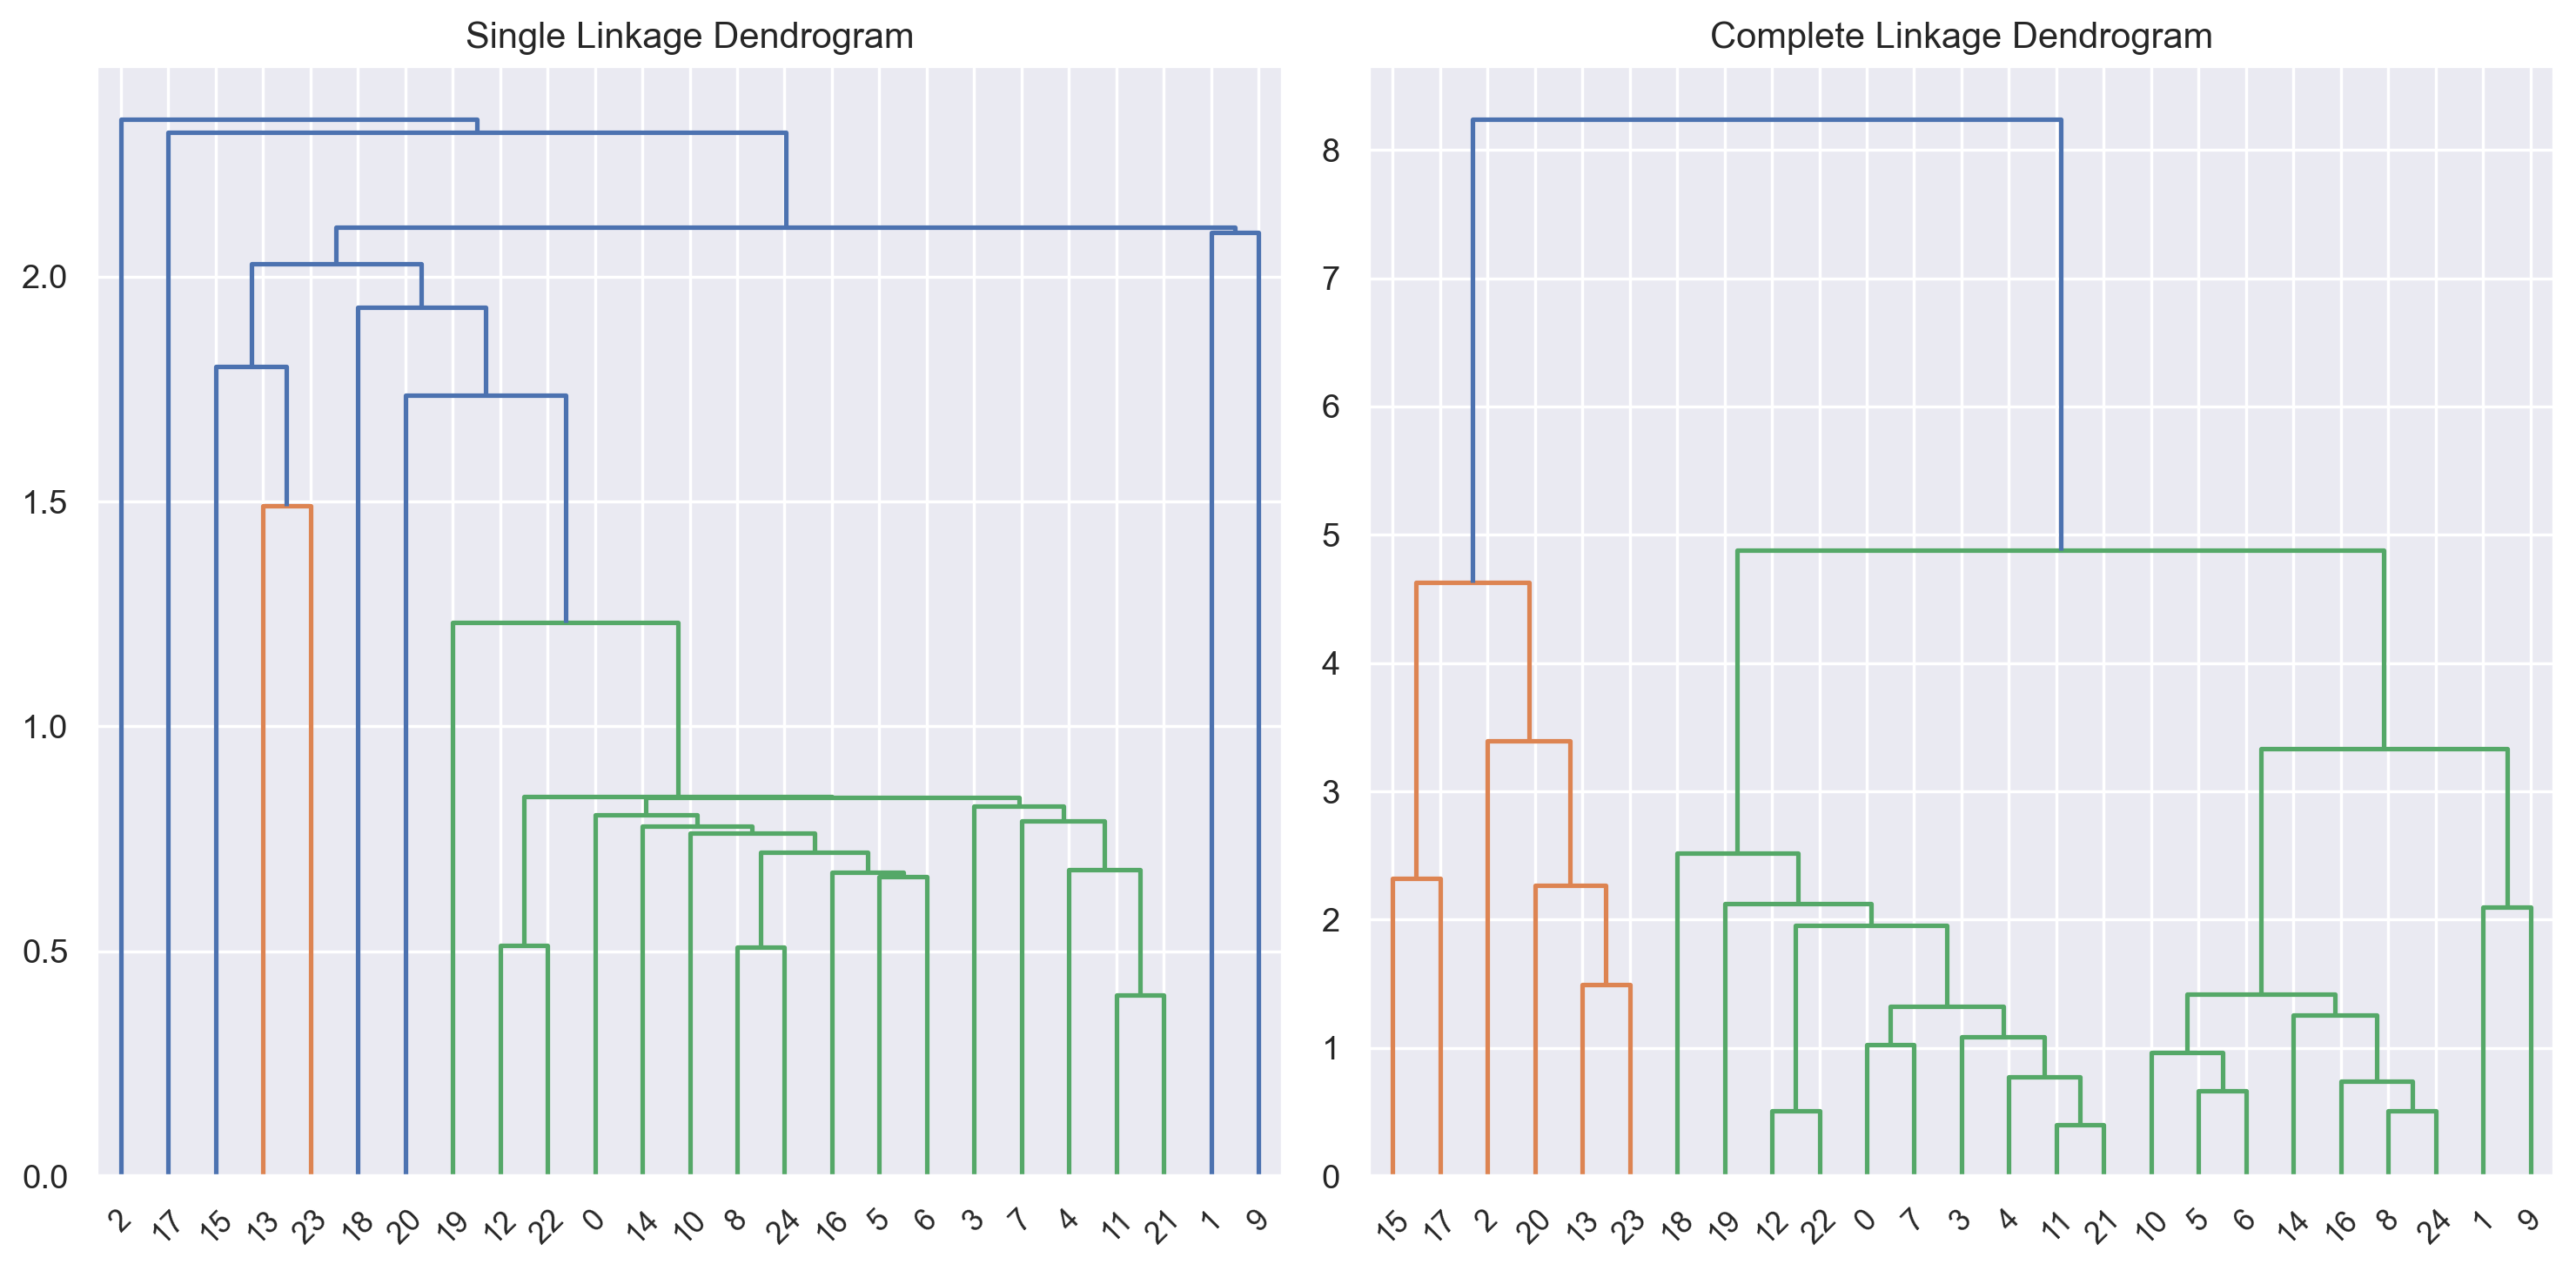

In [11]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the dendrogram for singlelinkage in the first subplot (ax1)
single_dend = hierarchy.dendrogram(singlelinkage, ax=ax1)
ax1.set_title('Single Linkage Dendrogram')

# Plot the dendrogram for completelinkage in the second subplot (ax2)
complete_dend = hierarchy.dendrogram(completelinkage, ax=ax2)
ax2.set_title('Complete Linkage Dendrogram')

# Display the plots
plt.tight_layout()
plt.show()

In [12]:
#Complete Linkage Dendrogram is better 

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
hc = AgglomerativeClustering(n_clusters=2)

ypred = hc.fit_predict(x)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [15]:
df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [16]:
df['cluster']= ypred
df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,1310,89,22,13,22704,94,0
1,1415,100,25,6,63575,81,0
2,1260,62,59,9,25026,72,0
3,1310,76,24,12,31510,88,0
4,1280,83,33,13,21864,90,0


In [17]:
#filter
df[df['cluster']==0]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,1310,89,22,13,22704,94,0
1,1415,100,25,6,63575,81,0
2,1260,62,59,9,25026,72,0
3,1310,76,24,12,31510,88,0
4,1280,83,33,13,21864,90,0
5,1340,89,23,10,32162,95,0
6,1315,90,30,12,31585,95,0
7,1255,74,24,12,20126,92,0
8,1400,91,14,11,39525,97,0
9,1305,75,44,7,58691,87,0


In [18]:
df[df['cluster']==1]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
13,1081,38,54,18,10185,80,1
15,1005,28,90,19,9066,69,1
17,1075,49,67,25,8704,67,1
23,1085,40,69,15,11857,71,1


In [19]:
# Single line filter
df.groupby('cluster').agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1305.47619,83.666667,33.333333,11.47619,30708.952381,89.571429
1,1061.50000,38.750000,70.000000,19.25000,9953.000000,71.750000


In [20]:
#4 cluster

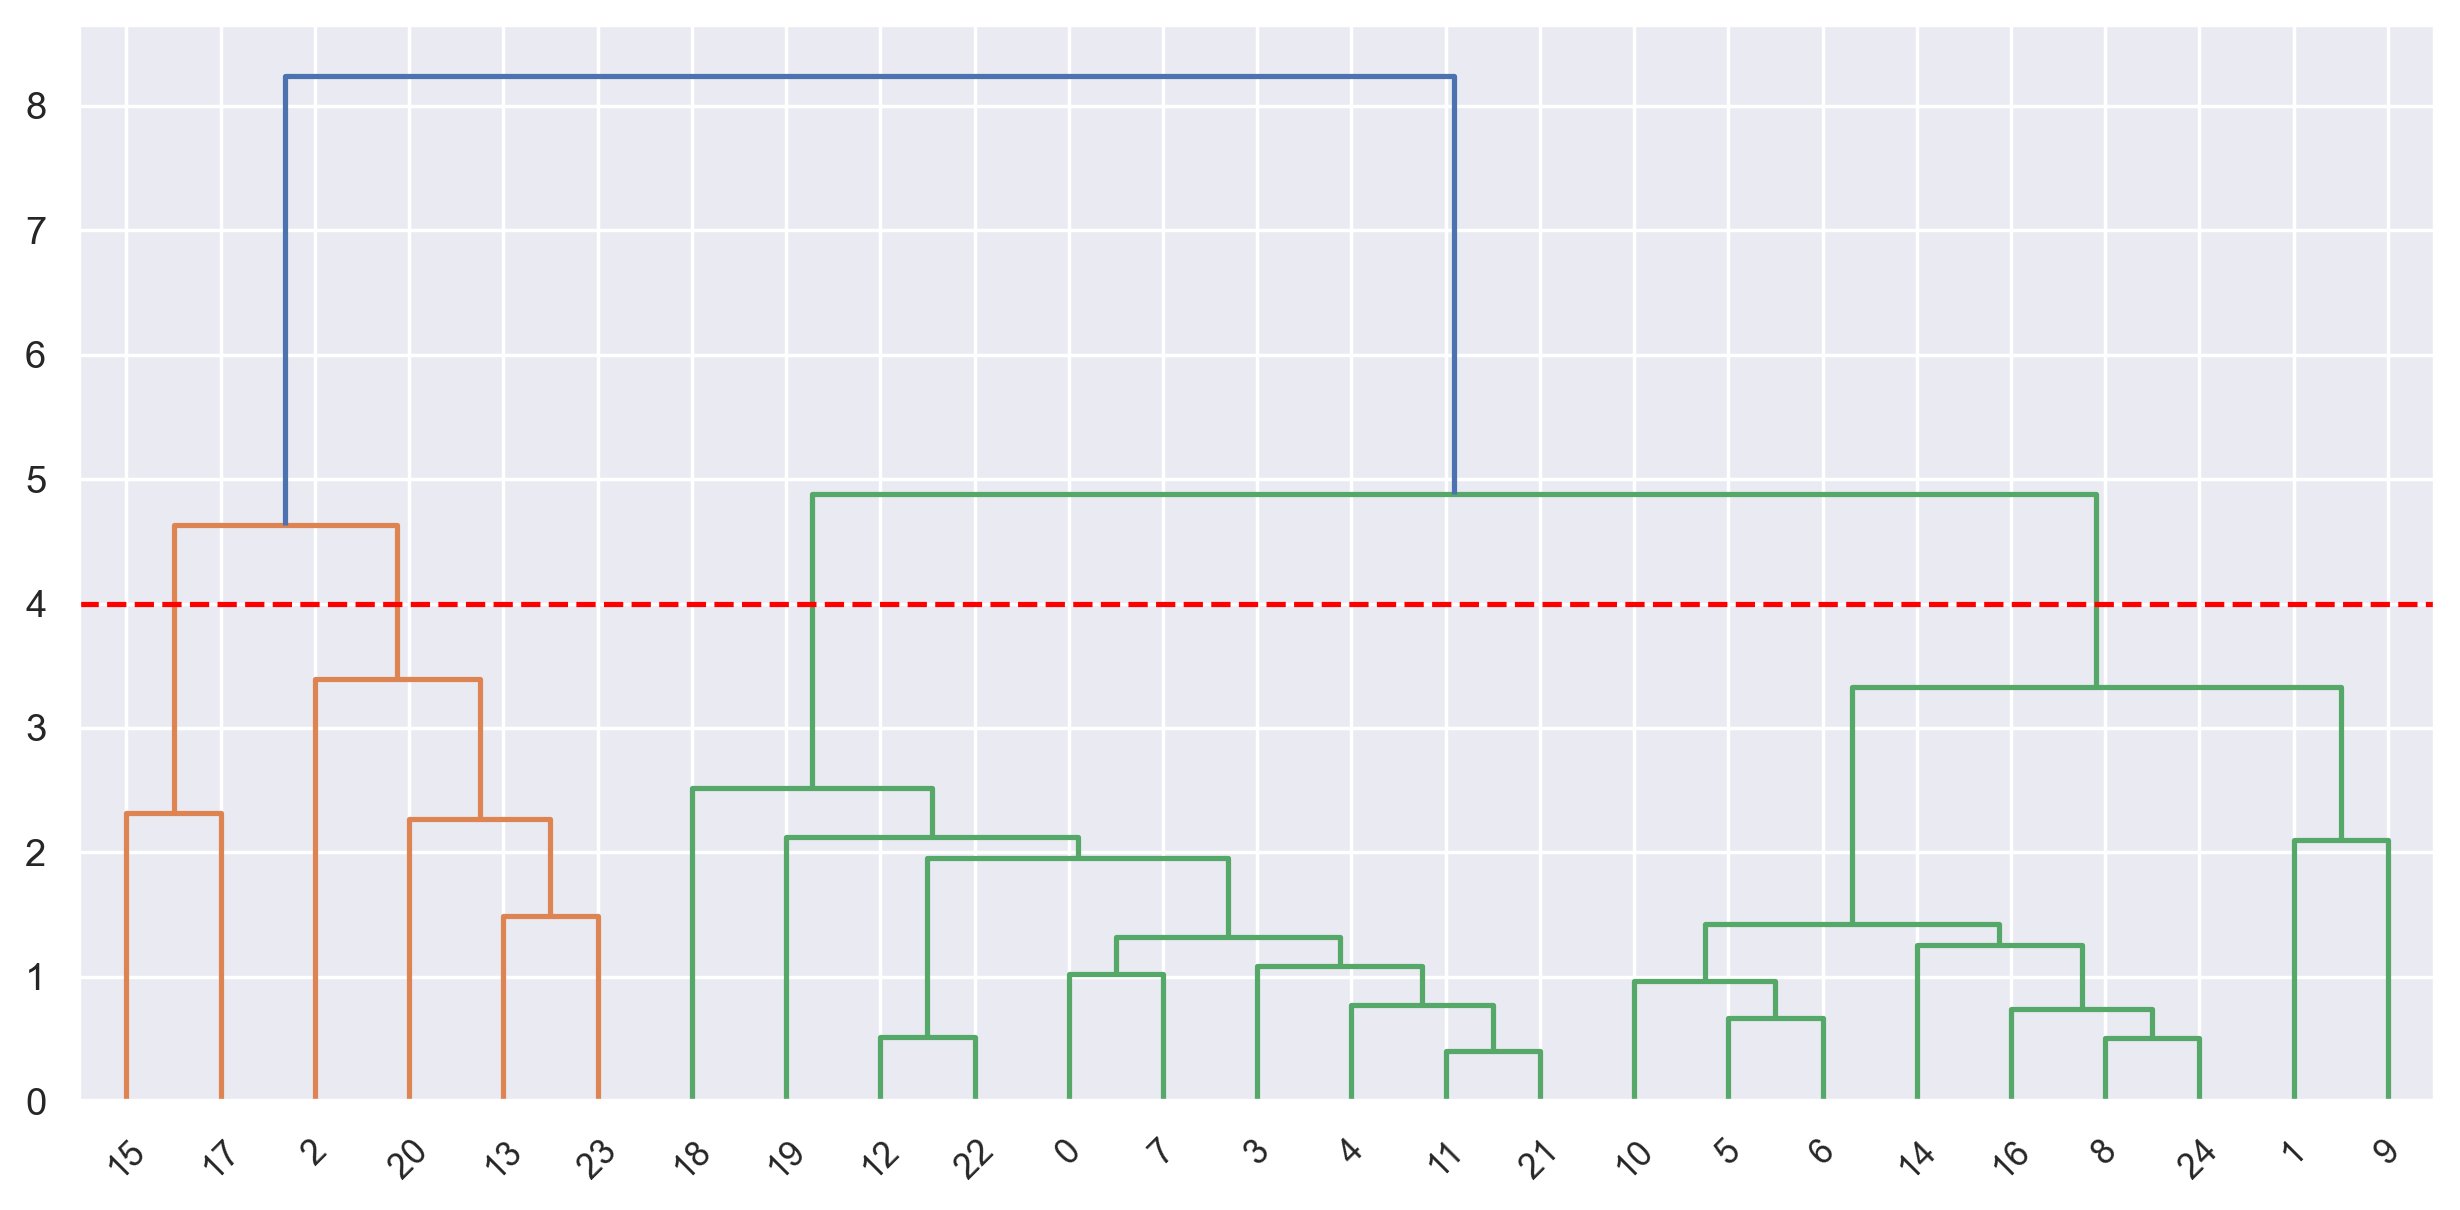

In [21]:
completelinkage = hierarchy.linkage(x, method='complete')
completedend = hierarchy.dendrogram(completelinkage)
plt.axhline(y =4, linestyle = '--', color= 'red')
plt.tight_layout()

In [22]:
hc = AgglomerativeClustering(n_clusters=4)

yp = hc.fit_predict(x)
yp

array([0, 2, 0, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 3], dtype=int64)

In [23]:
df= pd.read_excel('Universities.xlsx')
df.drop(columns="Univ", inplace=True)
df['Cluster'] = yp
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,1310,89,22,13,22704,94,0
1,1415,100,25,6,63575,81,2
2,1260,62,59,9,25026,72,0
3,1310,76,24,12,31510,88,0
4,1280,83,33,13,21864,90,0
5,1340,89,23,10,32162,95,3
6,1315,90,30,12,31585,95,3
7,1255,74,24,12,20126,92,0
8,1400,91,14,11,39525,97,3
9,1305,75,44,7,58691,87,2


In [24]:
df.groupby('Cluster').agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,
0,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429


In [25]:
# We can say that at 
# Cluster 0: Average Expensive College
# Cluster 1: Cheap  College
# Cluster 2: Most Expensive College
# Cluster 3: Expensive College
# If we want homogenous Cluster consider 4 Clusters and for more heterogeneous consider 2 cluster

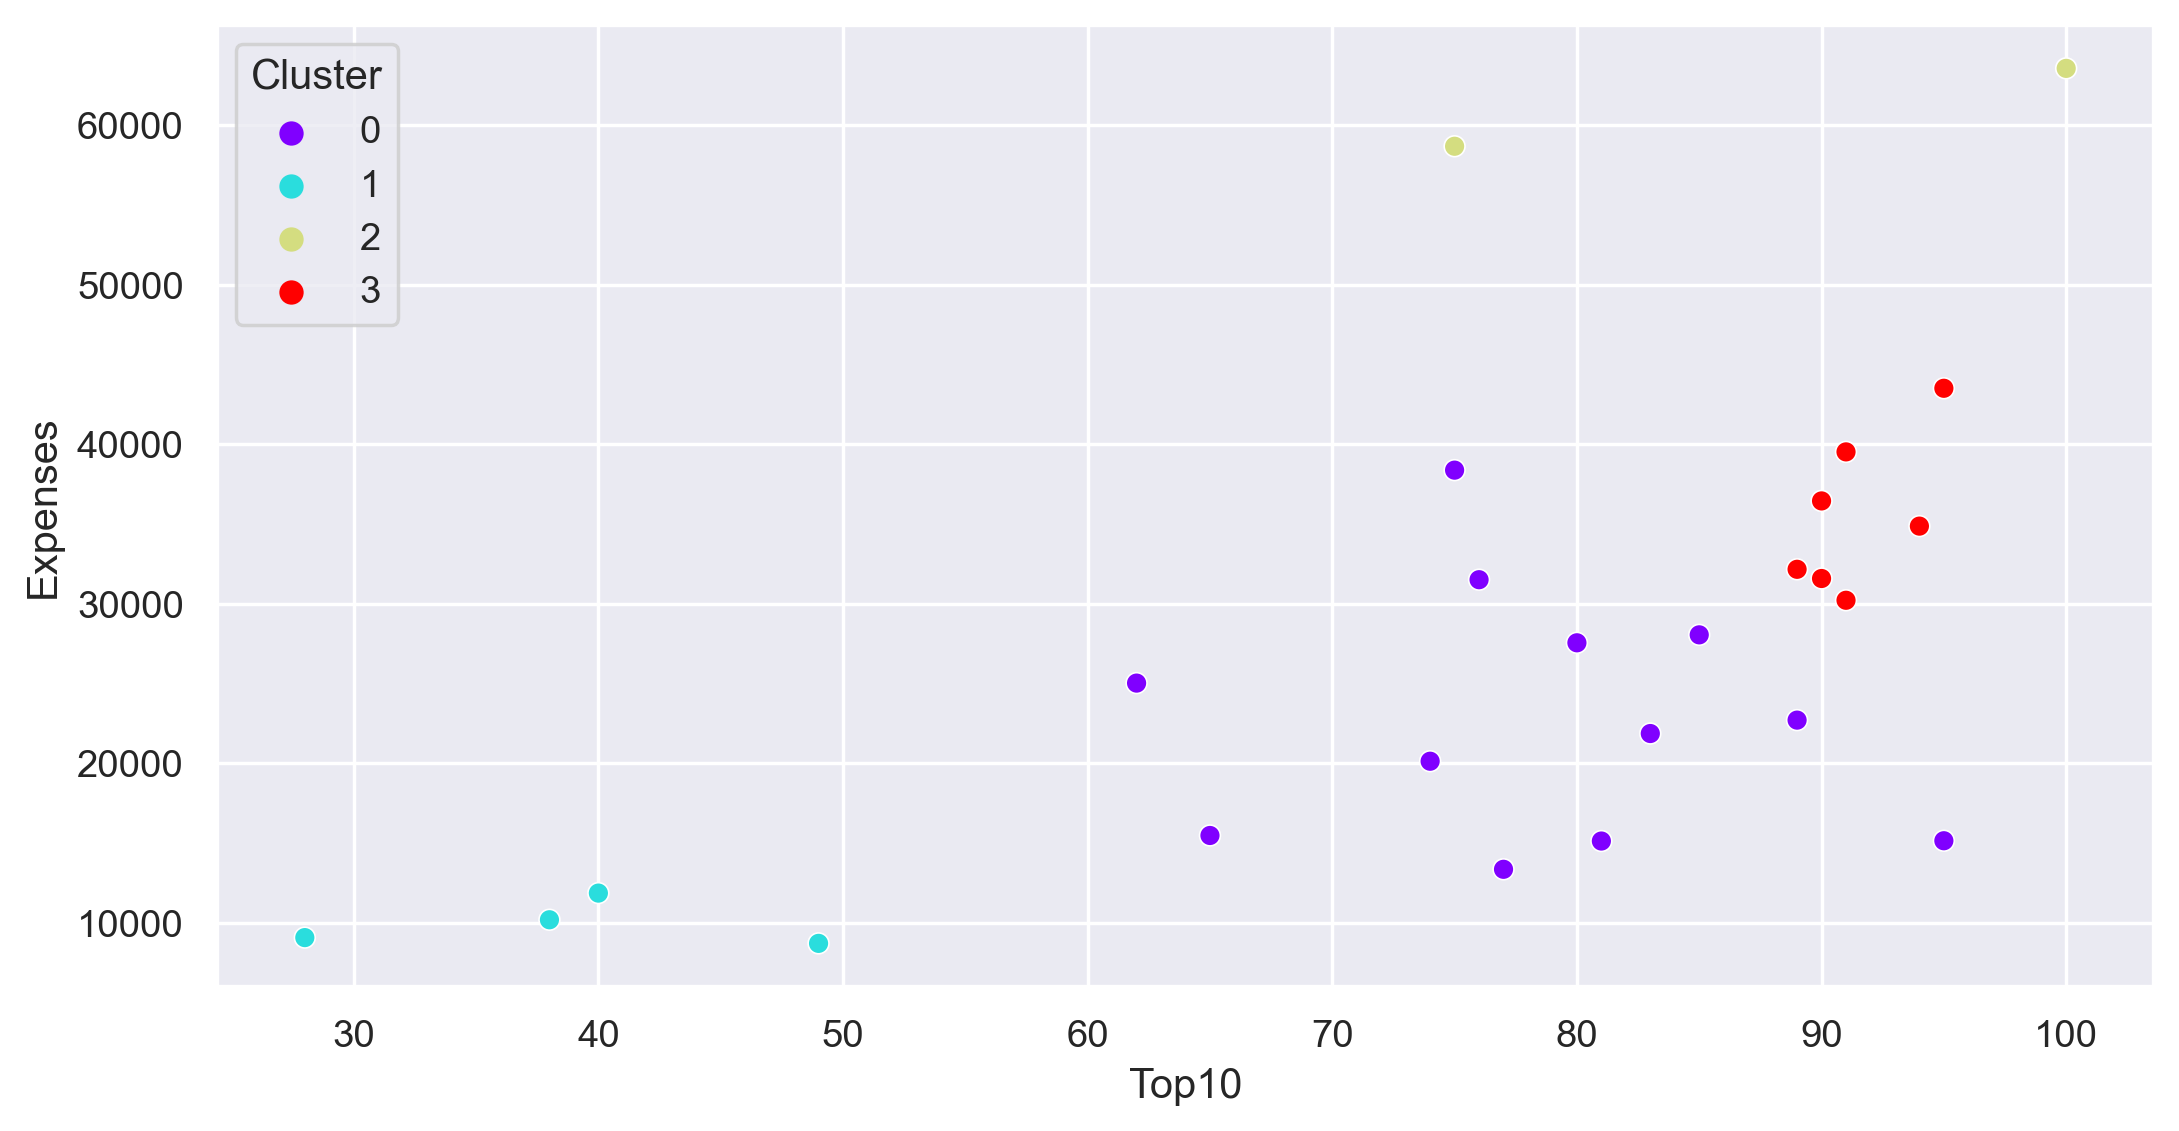

In [26]:
sns.scatterplot(x= df['Top10'], y=df['Expenses'], hue=df['Cluster'], palette='rainbow')
plt.show()

In [27]:
df[df['Cluster']== 0] #Average Expensive College

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,1310,89,22,13,22704,94,0
2,1260,62,59,9,25026,72,0
3,1310,76,24,12,31510,88,0
4,1280,83,33,13,21864,90,0
7,1255,74,24,12,20126,92,0
11,1260,85,39,11,28052,89,0
12,1255,81,42,13,15122,94,0
18,1240,95,40,17,15140,78,0
19,1290,75,50,13,38380,87,0
20,1180,65,68,16,15470,85,0


In [28]:
df[df["Cluster"]== 2] #Most Expensive College

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
1,1415,100,25,6,63575,81,2
9,1305,75,44,7,58691,87,2
